# CNN for acoustic scene classfication: my life environment

Date: March 20, 2019, Update: September 23, 2023

Neural network: input MFSCs to CNN

Location: Yokohama, Japan

## Preparing data set for CNN

In [1]:
DATASET_FOLDER = '../python/OscilloscopeGUI/dataset/Y2019/data_environment'

%run ../python/OscilloscopeGUI/script/dataset.py
%matplotlib inline

In [2]:
ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate(update=True)['mfsc']
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

'silence'

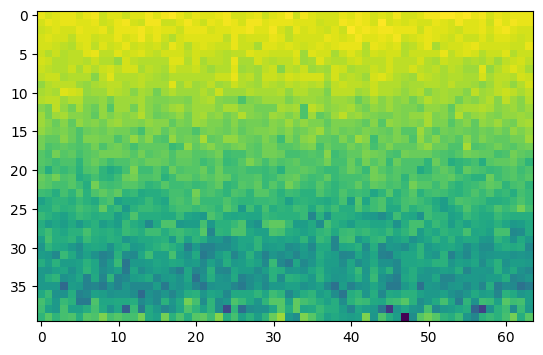

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.rot90(train_data[13].reshape(ds.shape)))
train_data.shape, test_data.shape
ds.class_labels[np.argmax(train_labels[13])]

### CNN model

In [22]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*ds.shape, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(ds.class_labels), activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 38, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 19, 8)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 31, 19, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 17, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 8, 16)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 14, 8, 16)        

In [23]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Training CNN

In [24]:
EPOCHS = 50
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Epoch 1/50
35/35 [==============================] - 3s 52ms/step - loss: 1.8303 - accuracy: 0.3045 - val_loss: 1.5319 - val_accuracy: 0.4792
Epoch 2/50
35/35 [==============================] - 1s 42ms/step - loss: 1.4037 - accuracy: 0.4812 - val_loss: 1.2890 - val_accuracy: 0.5875
Epoch 3/50
35/35 [==============================] - 1s 42ms/step - loss: 1.1896 - accuracy: 0.5705 - val_loss: 1.1094 - val_accuracy: 0.6479
Epoch 4/50
35/35 [==============================] - 1s 41ms/step - loss: 1.0263 - accuracy: 0.6179 - val_loss: 0.9867 - val_accuracy: 0.6646
Epoch 5/50
35/35 [==============================] - 1s 41ms/step - loss: 0.8930 - accuracy: 0.6848 - val_loss: 0.8819 - val_accuracy: 0.7229
Epoch 6/50
35/35 [==============================] - 1s 41ms/step - loss: 0.8108 - accuracy: 0.6973 - val_loss: 0.8087 - val_accuracy: 0.7500
Epoch 7/50
35/35 [==============================] - 1s 41ms/step - loss: 0.7335 - accuracy: 0.7312 - val_loss: 0.7251 - val_accuracy: 0.7521
Epoch 8/50
35

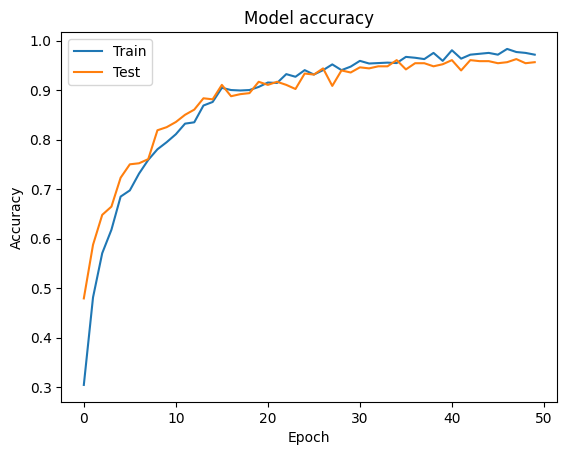

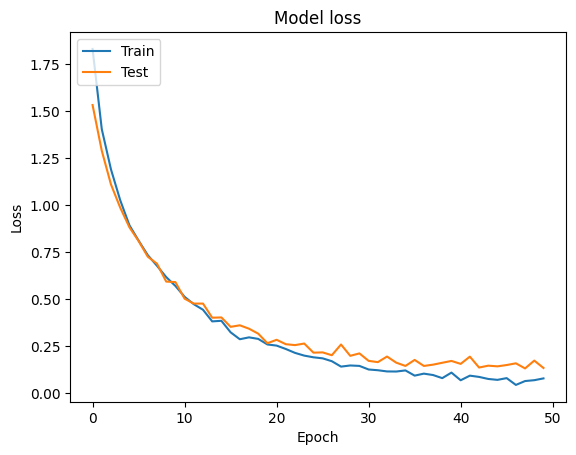

In [25]:
plot_accuracy(history)
plot_loss(history)

## Save the model

In [26]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/my_life_environment_cnn_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [27]:
del model
model = models.load_model(filename)

## Confirmation

In [28]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)

15/15 [==============================] - 0s 14ms/step


In [29]:
ds.class_labels

['silence',
 'train',
 'station',
 'fastfood',
 'escalator',
 'mall',
 'ship',
 'mall2']

In [30]:
(activations[-1][:10]*100).astype(int)

array([[ 0, 98,  1,  0,  0,  0,  0,  0],
       [ 0,  2,  1, 92,  0,  0,  0,  2],
       [99,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 99,  0,  0,  0],
       [99,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 56,  0,  0,  0, 43,  0,  0],
       [ 0, 99,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0, 91,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 99],
       [99,  0,  0,  0,  0,  0,  0,  0]])

In [31]:
test_labels[:10].astype(int)

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0]])

'station'

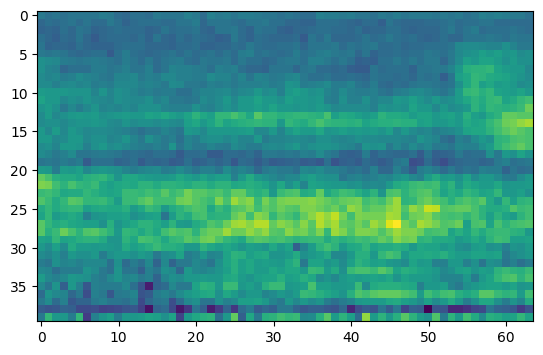

In [32]:
image_number = 56

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
ds.class_labels[np.argmax(test_labels[image_number])]

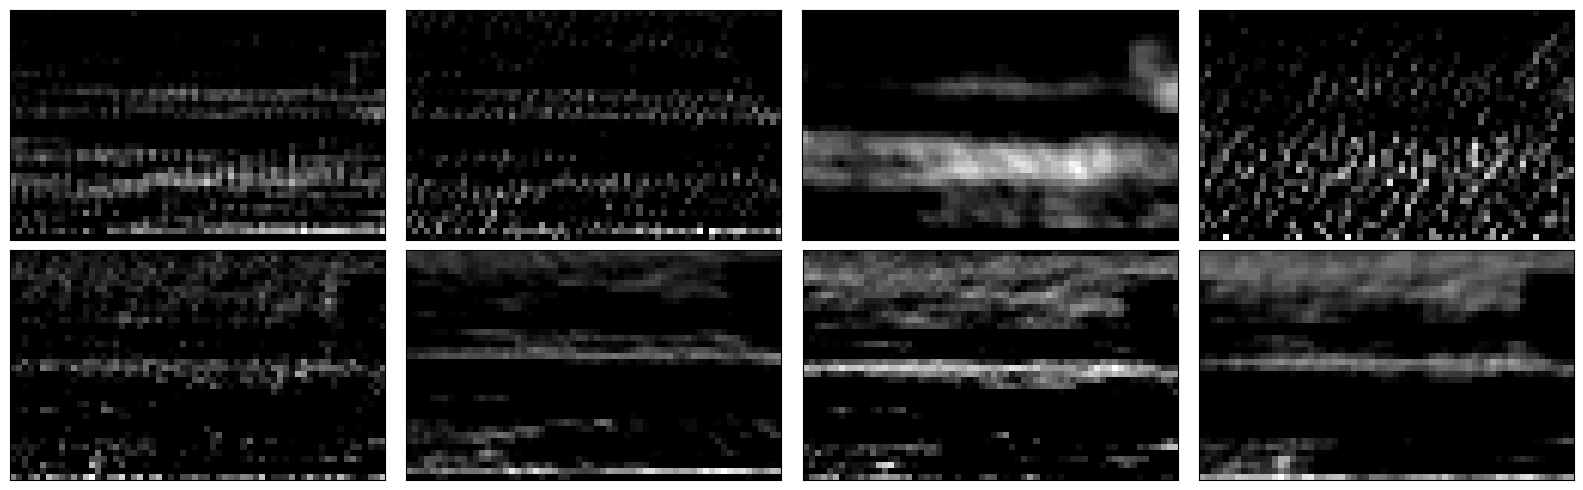

In [33]:
plot_layer(activations, image_number, 0, 4)

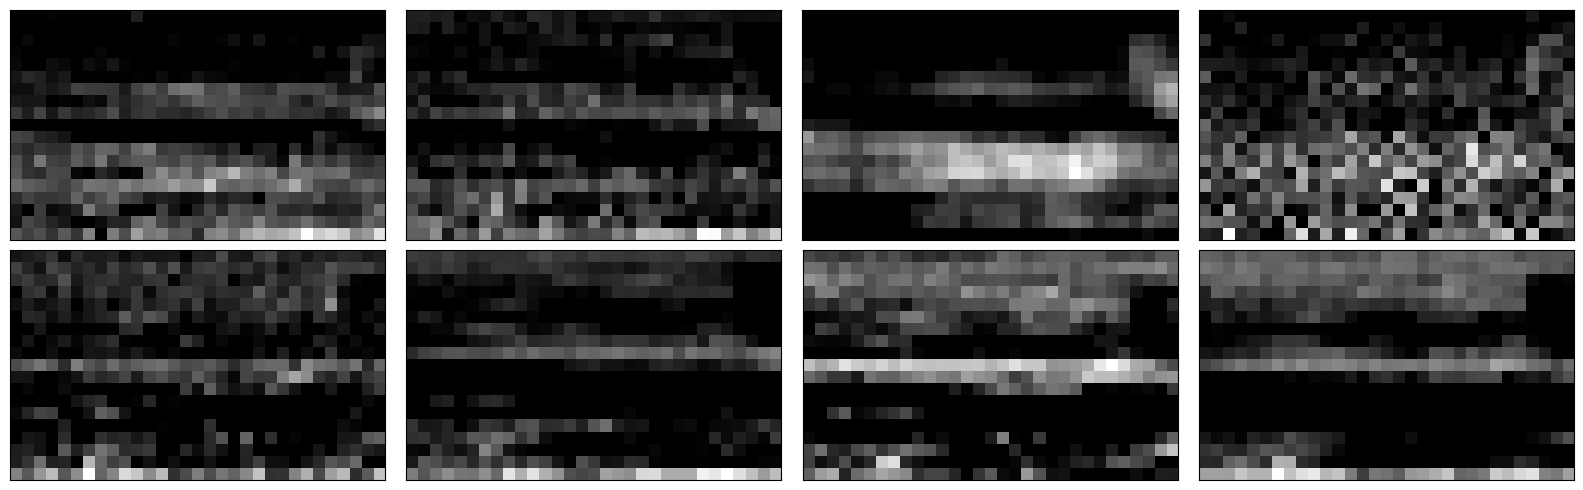

In [34]:
plot_layer(activations, image_number, 1, 4)

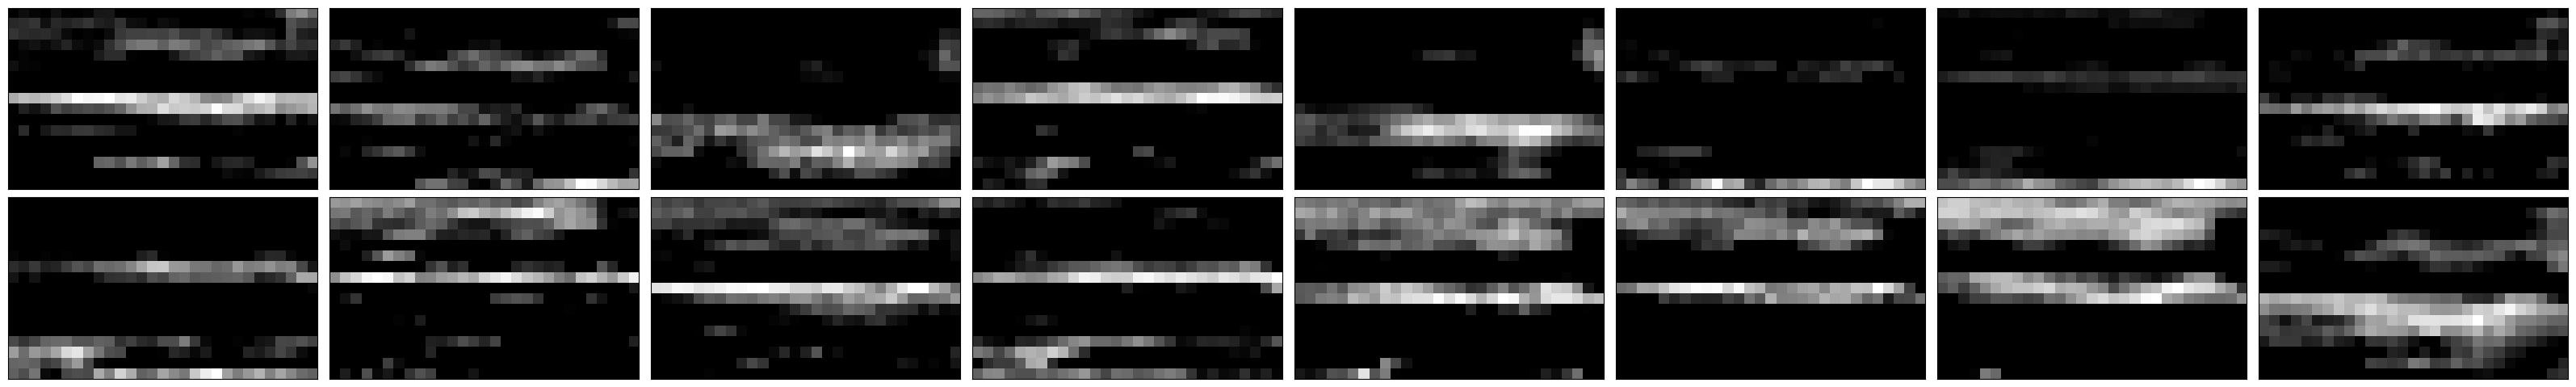

In [35]:
plot_layer(activations, image_number, 3, 8)

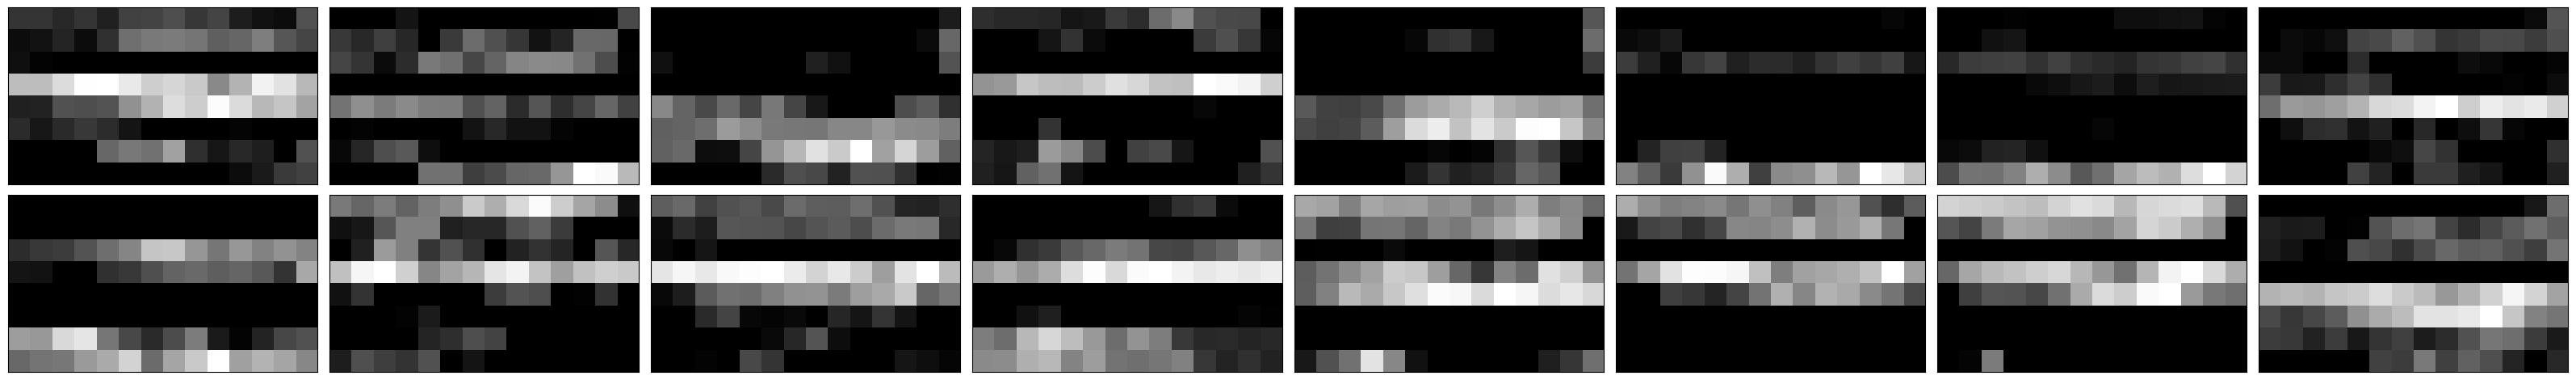

In [36]:
plot_layer(activations, image_number, 4, 8)

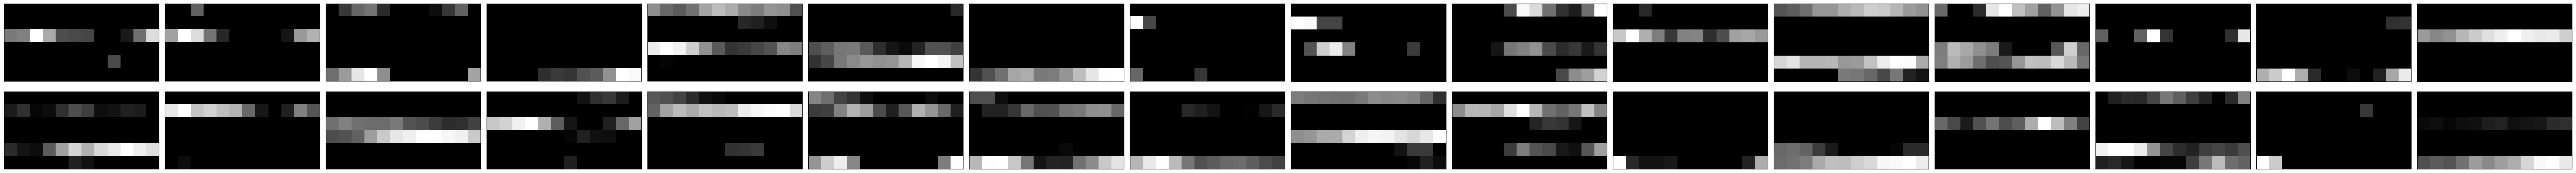

In [37]:
plot_layer(activations, image_number, 6, 16)

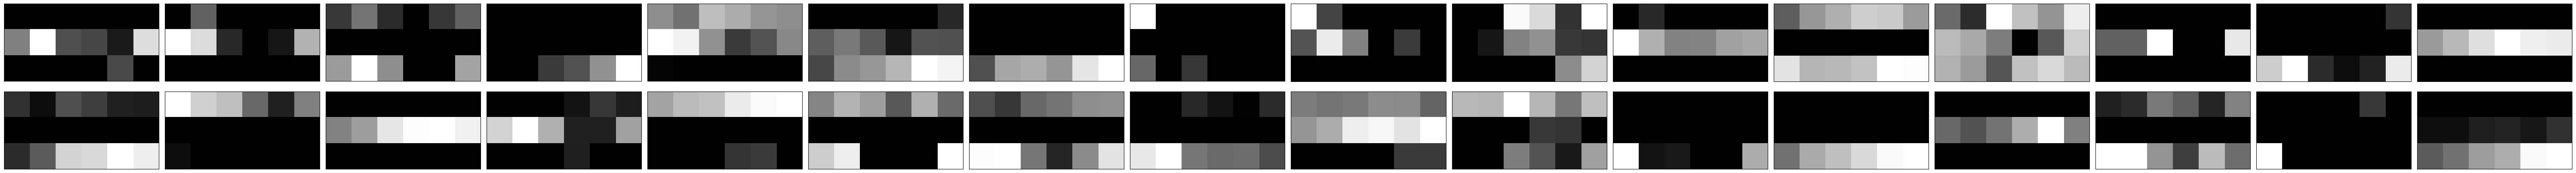

In [38]:
plot_layer(activations, image_number, 7, 16)